<a href="https://colab.research.google.com/github/zoraizmohammad/dukeClasses/blob/main/sta240/finalProject/STA240FinalSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***STA240 Final Project***
Completed by: Mohammad Zoraiz & Sylvester Johannes Arizie


# ***General Tasks***
This project is intended as a simulation case study that applies the concepts you learned in class as well as the computational tools you learned in lab. Much of your work will be in coding up a simulation framework that realistically simulates the arrival, service and waiting
times of customers in your business. You might wish to try the following steps to set up the simulator for the base scenario 1 (see below):
1. Code a subprocedure that simulates the arrival times of customers throughout the day.
2. Code a subprocedure that, given output from (a), simulates the serving times of these
customers before they leave.
3. Given output from (a) and (b), code a subprocedure that tells you at a given time point, how many customers are waiting in line, how many customers are being served, and whether the restaurant is experiencing down-time.
4. You can build upon these subprocedures to construct more elaborate and realistic simulation workflows for your restaurant, e.g., Scenario 2 and other scenarios you wish to explore.

Students in prior classes have found it useful to drop by office hours to seek help on coding, so you are more than welcome to do that – we’re here to help!

Project Preview: https://drive.google.com/file/d/1IqlXxooZe8gVvy2u_euSSERWRLfRDYrz/view?usp=sharing

# **Scenario  1**
Consider the simple setting with one dining table and one chef, with operating
hours 10am - 10pm. Suppose customers arrive according to a Poisson process with a rate of λ<sub>A</sub> = 5 per hour. Once a customer arrives, their total service time (ordering, cooking and eating) can be modeled by an exponential distribution with rate λ<sub>S</sub> = 6.

*Note:* It is reasonable to assume waiting and service times for each customer are independently distributed. If a customer arrives and the dining table is occupied, then they would wait in line until the table is vacant.



**1. Arrival TIme Subprocedure**

In [18]:
generate_arrival_times <- function(lambda, hours) {
  total_time <- hours * 60 # Convert hours to minutes
  arrivals <- cumsum(rexp(ceiling(lambda * total_time / 60), rate = lambda / 60))
  arrivals <- arrivals[arrivals <= total_time] # Only include arrivals within operating hours
  return(arrivals)
}

# Example
lambda_A <- 5
operating_hours <- 12 # From 10 AM to 10 PM
arrival_times <- round(generate_arrival_times(lambda_A, operating_hours), digits=3)

return (arrival_times)

[1]   9.961   9.990  20.057  23.657  24.897  40.768  59.019  78.675 114.831
[10] 117.174 118.318 129.204 135.531 149.751 196.240 213.186 216.663 218.763
[19] 248.881 267.423 307.158 308.994 405.295 449.628 456.541 485.014 501.008
[28] 516.155 521.738 523.413 532.043 535.523 537.508 549.454 565.415 587.818
[37] 607.888 616.350 620.965 625.099 632.146 635.519 646.261 647.113 658.464
[46] 658.727 674.888 681.067 696.095

**2. Serving time simulation of these customers before they leave.**

In [17]:
generate_service_times <- function(lambda, num_customers) {
  rexp(num_customers, rate = lambda)
}

# Example
lambda_S <- 6
service_times <- round(generate_service_times(lambda_S, length(arrival_times)), digits = 3)

return (service_times)

[1] 0.241 0.224 0.129 0.036 0.209 0.056 0.104 0.286 0.018 0.188 0.542 0.417
[13] 0.126 0.348 0.137 0.084 0.023 0.220 0.806 0.060 0.087 0.030 0.333 0.233
[25] 0.247 0.288 0.185 0.008 0.509 0.075 0.052 0.254 0.303 0.240 0.057 0.121
[37] 0.031 0.109 0.106 0.055 0.011 0.004 0.092 0.384 0.134 0.196 0.053 0.037
[49] 0.034 0.097 0.254

**3. At a given time point, how many customers are waiting in line, how many customers are being served, and whether the restaurant is experiencing down-time.**

In [20]:
simulate_restaurant <- function(arrival_times, service_times) {
  n <- length(arrival_times)
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)
  table_free_time <- 0

  for (i in 1:n) {
    if (arrival_times[i] >= table_free_time) {
      # Customer is served immediately
      start_times[i] <- arrival_times[i]
    } else {
      # Customer waits
      start_times[i] <- table_free_time
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time <- end_times[i]
  }

  list(
    arrival_times = arrival_times,
    start_times = start_times,
    end_times = end_times,
    waiting_times = waiting_times,
    downtime = max(0, sum(diff(c(0, end_times)) - diff(c(0, arrival_times))))
  )
}

# Example
simulation_result <- simulate_restaurant(arrival_times, service_times)

return (simulation_result)

$arrival_times
 [1]   9.961   9.990  20.057  23.657  24.897  40.768  59.019  78.675 114.831
[10] 117.174 118.318 129.204 135.531 149.751 196.240 213.186 216.663 218.763
[19] 248.881 267.423 307.158 308.994 405.295 449.628 456.541 485.014 501.008
[28] 516.155 521.738 523.413 532.043 535.523 537.508 549.454 565.415 587.818
[37] 607.888 616.350 620.965 625.099 632.146 635.519 646.261 647.113 658.464
[46] 658.727 674.888 681.067 696.095

$start_times
 [1]   9.961  10.202  20.057  23.657  24.897  40.768  59.019  78.675 114.831
[10] 117.174 118.318 129.204 135.531 149.751 196.240 213.186 216.663 218.763
[19] 248.881 267.423 307.158 308.994 405.295 449.628 456.541 485.014 501.008
[28] 516.155 521.738 523.413 532.043 535.523 537.508 549.454 565.415 587.818
[37] 607.888 616.350 620.965 625.099 632.146 635.519 646.261 647.113 658.464
[46] 658.727 674.888 681.067 696.095

$end_times
 [1]  10.202  10.426  20.186  23.693  25.106  40.824  59.123  78.961 114.849
[10] 117.362 118.860 129.621 135.657 150.099 196.377 213.270 216.686 218.983
[19] 249.687 267.483 307.245 309.024 405.628 449.861 456.788 485.302 501.193
[28] 516.163 522.247 523.488 532.095 535.777 537.811 549.694 565.472 587.939
[37] 607.919 616.459 621.071 625.154 632.157 635.523 646.353 647.497 658.598
[46] 658.923 674.941 681.104 696.129

$waiting_times
 [1] 0.000 0.212 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[13] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[25] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[37] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[49] 0.000

$downtime
[1] 0.034

In [22]:
summarize_simulation <- function(simulation) {
  avg_waiting_time <- mean(simulation$waiting_times)
  total_downtime <- simulation$downtime
  num_customers <- length(simulation$arrival_times)

  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Total Downtime:", total_downtime, "minutes\n")
  cat("Number of Customers Served:", num_customers, "\n")
}

summarize_simulation(simulation_result)

Average Waiting Time: 0.004326531 minutes
Total Downtime: 0.034 minutes
Number of Customers Served: 49 


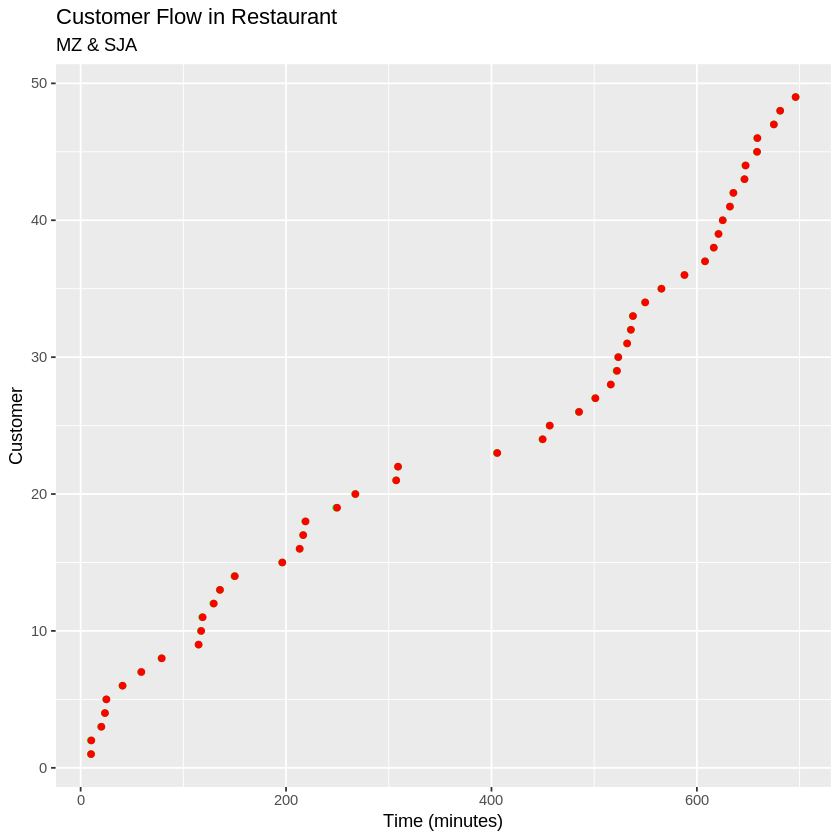

In [27]:
library(ggplot2)

plot_simulation <- function(simulation) {
  df <- data.frame(
    Customer = 1:length(simulation$arrival_times),
    Arrival = simulation$arrival_times,
    Start = simulation$start_times,
    End = simulation$end_times
  )
  ggplot(df) +
    geom_segment(aes(x = Arrival, xend = End, y = Customer, yend = Customer), color = "blue") +
    geom_point(aes(x = Arrival, y = Customer), color = "green") +
    geom_point(aes(x = End, y = Customer), color = "red") +
    labs(x = "Time (minutes)", y = "Customer", title = "Customer Flow in Restaurant", subtitle = "MZ & SJA")
}

plot_simulation(simulation_result)

# **4. Other Possible Scenarios Based Off of Scenario 1**
- ***Sub-scenario 1.2: Two Dining Tables and One Chef***
  - Change: There are now two dining tables, but only one chef. The chef alternates between tables, so only one table can be served at a time.
 - Effect: Customers at one table may have to wait until the chef is free.
- ***Sub-scenario 1.3: VIP Customers with Priority Service***
 - Change: VIP customers (20% of arrivals) get priority over regular customers. VIP customers are always served first, regardless of the queue.
 - Effect: Regular customers might face longer waiting times due to VIPs being prioritized.
- ***Sub-scenario 1.4: Dynamic Service Rates Based on Gamma Distribution
Gamma Distribution***
 - The shape (α) parameter determines how "spread out" the rates are. The scale (β) parameter adjusts the average rate.
 - Gamma distribution models cumulative factors like fatigue, complexity of orders, or efficiency variations during the day.
 - In this example:
    - **Peak Hours** (6-8) Gamma Distribution Parameters (*High Customer Traffic*):
      - *Shape (α=2):* Represents a small number of contributing factors affecting service efficiency (e.g., fatigue and multitasking).
      - *Scale (β=0.2):* Produces a lower mean service rate and more concentrated rates, reflecting that the chef's performance is relatively stable but slower overall during peak hours.
      - *Resulting Service Rates:* Rates are centered around a lower value, with most rates in the range of 0.4 to 1 jobs/hour, meaning the chef handles fewer customers per hour due to higher stress.
    - **Off-Peak Hours** Gamma Distibution Parameters (*Low/Normal Customer Traffic*):
      - *Shape (α=5):*  Represents a larger number of factors contributing to efficiency (e.g., experience, adequate breaks, and fewer distractions).
      - *Scale (β=0.5):*  Produces a higher mean service rate with more variability, reflecting that the chef can handle a broader range of customers efficiently during off-peak times.
      - *Resulting Service Rates:*  Rates are higher and more spread out, typically in the range of 2 to 4 jobs/hour, meaning the chef is more productive and adaptable.



### **Subscenario 1.2: Two Dining Tables with 1 Chef**


Summary Statistics:
Average Waiting Time: 0 minutes
Total Customers Served: 60 
Total Downtime: 0.08577413 minutes
   Customer    Arrival      Start        End Waiting_Time
1         1   1.751288   1.751288   1.761292            0
2         2   9.035124   9.035124   9.359904            0
3         3  10.324822  10.324822  10.891206            0
4         4  19.076329  19.076329  19.136017            0
5         5  19.331179  19.331179  19.358386            0
6         6  20.080152  20.080152  21.136068            0
7         7  33.204342  33.204342  33.249399            0
8         8  52.121644  52.121644  52.314820            0
9         9  54.952485  54.952485  55.059538            0
10       10  70.793841  70.793841  70.852352            0
11       11  79.417721  79.417721  80.266439            0
12       12  82.835122  82.835122  83.041913            0
13       13  99.618267  99.618267  99.708182            0
14       14 107.963370 107.963370 108.080538            0
15       15 109

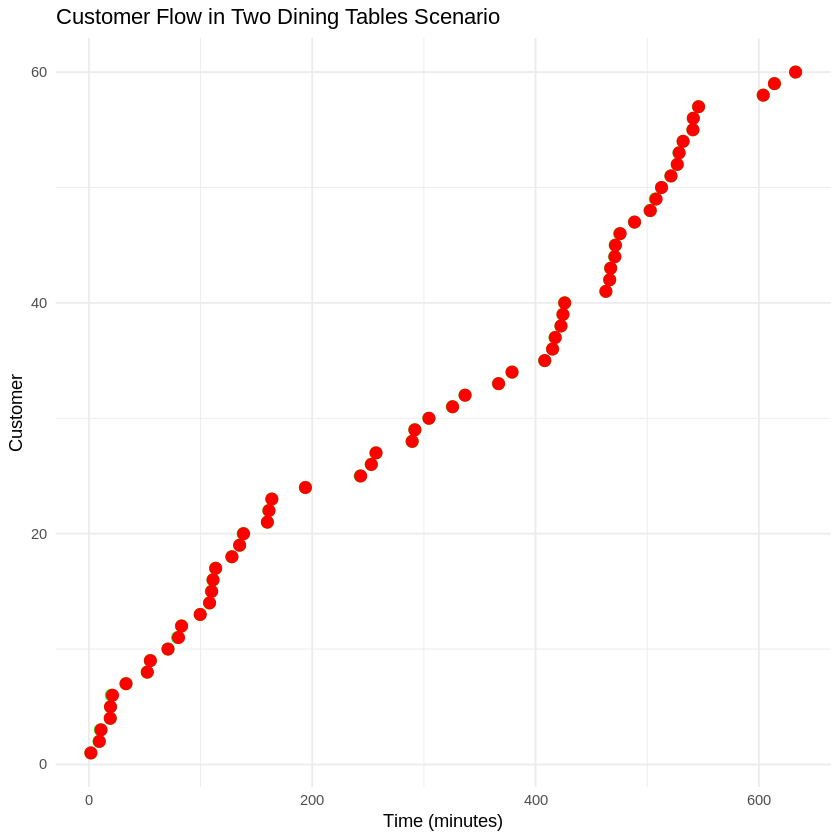

In [34]:
simulate_two_tables <- function(arrival_times, service_times) {
  n <- length(arrival_times)
  table_free_time <- c(0, 0) # Free time for both tables
  start_times <- numeric(n)
  end_times <- numeric(n)
  waiting_times <- numeric(n)

  for (i in 1:n) {
    # Assign to the table that becomes free first
    assigned_table <- which.min(table_free_time)
    if (arrival_times[i] >= table_free_time[assigned_table]) {
      start_times[i] <- arrival_times[i]
    } else {
      start_times[i] <- table_free_time[assigned_table]
    }
    waiting_times[i] <- start_times[i] - arrival_times[i]
    end_times[i] <- start_times[i] + service_times[i]
    table_free_time[assigned_table] <- end_times[i]
  }

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = start_times,
    End = end_times,
    Waiting_Time = waiting_times
  )

  # Summary statistics
  avg_waiting_time <- mean(waiting_times)
  total_customers <- n
  total_downtime <- sum(diff(c(0, sort(end_times))) - diff(c(0, sort(arrival_times))))

  # Print summary statistics
  cat("Summary Statistics:\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Total Customers Served:", total_customers, "\n")
  cat("Total Downtime:", total_downtime, "minutes\n")

  return(list(raw_data = raw_data))
}

# Simulate and get results
result_two_tables <- simulate_two_tables(arrival_times, service_times)

# Output raw data
print(result_two_tables$raw_data)

# Plot
plot_simulation <- function(simulation_data) {
  ggplot(simulation_data) +
    geom_segment(aes(x = Arrival, xend = End, y = Customer, yend = Customer), color = "blue") +
    geom_point(aes(x = Arrival, y = Customer), color = "green", size = 3, shape = 21, fill = "green") +
    geom_point(aes(x = End, y = Customer), color = "red", size = 3, shape = 21, fill = "red") +
    labs(
      x = "Time (minutes)",
      y = "Customer",
      title = "Customer Flow in Two Dining Tables Scenario"
    ) +
    theme_minimal()
}

plot_simulation(result_two_tables$raw_data)


### **Subscenario 1.3: VIP Customers with Priority Service**


Summary Statistics:
Average Waiting Time (Overall): 0 minutes
Average Waiting Time (VIP): 0 minutes
Average Waiting Time (Regular): 0 minutes
   Customer    Arrival      Start        End Waiting_Time Priority
1         1   1.751288   1.751288   1.761292            0      VIP
2         2   9.035124   9.035124   9.359904            0      VIP
3         3  10.324822  10.324822  10.891206            0  Regular
4         4  19.076329  19.076329  19.136017            0      VIP
5         5  19.331179  19.331179  19.358386            0  Regular
6         6  20.080152  20.080152  21.136068            0      VIP
7         7  33.204342  33.204342  33.249399            0      VIP
8         8  52.121644  52.121644  52.314820            0      VIP
9         9  54.952485  54.952485  55.059538            0  Regular
10       10  70.793841  70.793841  70.852352            0  Regular
11       11  79.417721  79.417721  80.266439            0      VIP
12       12  82.835122  82.835122  83.041913          

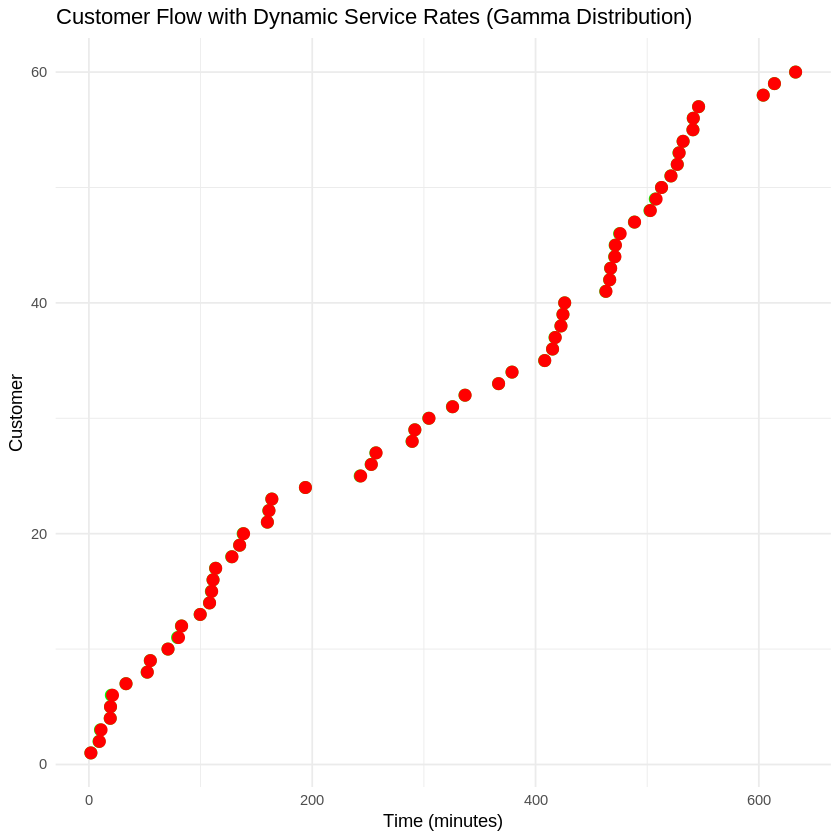

In [39]:
simulate_vip_priority <- function(arrival_times, service_times, vip_prob = 0.5) {
  n <- length(arrival_times)
  is_vip <- rbinom(n, 1, vip_prob) # Assign VIP status (1 for VIP, 0 for regular)
  vip_indices <- which(is_vip == 1)
  regular_indices <- which(is_vip == 0)

  # Separate VIP and regular customers
  vip_arrivals <- arrival_times[vip_indices]
  vip_services <- service_times[vip_indices]
  regular_arrivals <- arrival_times[regular_indices]
  regular_services <- service_times[regular_indices]

  # Merge VIPs and regular customers into a priority queue
  all_arrivals <- c(vip_arrivals, regular_arrivals)
  all_services <- c(vip_services, regular_services)
  priorities <- c(rep("VIP", length(vip_arrivals)), rep("Regular", length(regular_arrivals)))
  priority_order <- order(all_arrivals, priorities) # VIPs served first if arrival time is the same

  ordered_arrivals <- all_arrivals[priority_order]
  ordered_services <- all_services[priority_order]
  ordered_priorities <- priorities[priority_order]

  # Simulate the prioritized queue
  result <- simulate_restaurant(ordered_arrivals, ordered_services)

  # Add priority to the raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = ordered_arrivals,
    Start = result$start_times,
    End = result$end_times,
    Waiting_Time = result$waiting_times,
    Priority = ordered_priorities
  )

  # Summary statistics
  avg_waiting_time <- mean(result$waiting_times)
  avg_waiting_time_vip <- mean(result$waiting_times[ordered_priorities == "VIP"])
  avg_waiting_time_regular <- mean(result$waiting_times[ordered_priorities == "Regular"])

  cat("Summary Statistics:\n")
  cat("Average Waiting Time (Overall):", avg_waiting_time, "minutes\n")
  cat("Average Waiting Time (VIP):", avg_waiting_time_vip, "minutes\n")
  cat("Average Waiting Time (Regular):", avg_waiting_time_regular, "minutes\n")

  return(list(raw_data = raw_data))
}

# Simulate and plot
result_vip <- simulate_vip_priority(arrival_times, service_times)
print(result_vip$raw_data)
plot_simulation(result_vip$raw_data)


### **Subscenario 1.4: Dynamic Service Rates Based on Gamma Distribution**


Summary Statistics:
Average Waiting Time: 0.1498139 minutes
Average Service Rate (Peak Hours): 0.4540379 jobs/hour
Average Service Rate (Off-Peak Hours): 2.31309 jobs/hour
   Customer    Arrival      Start        End Waiting_Time Service_Rate
1         1   1.751288   1.751288   1.843519    0.0000000    2.3711437
2         2   9.035124   9.035124   9.682384    0.0000000    2.9856645
3         3  10.324822  10.324822  10.330997    0.0000000    2.3289055
4         4  19.076329  19.076329  19.225079    0.0000000    3.3276951
5         5  19.331179  19.331179  20.364390    0.0000000    1.7798023
6         6  20.080152  20.364390  20.574211    0.2842385    2.0626349
7         7  33.204342  33.204342  33.257443    0.0000000    4.7296156
8         8  52.121644  52.121644  52.182497    0.0000000    2.9238648
9         9  54.952485  54.952485  54.965106    0.0000000    3.1044281
10       10  70.793841  70.793841  70.813476    0.0000000    2.1216753
11       11  79.417721  79.417721  79.545994   

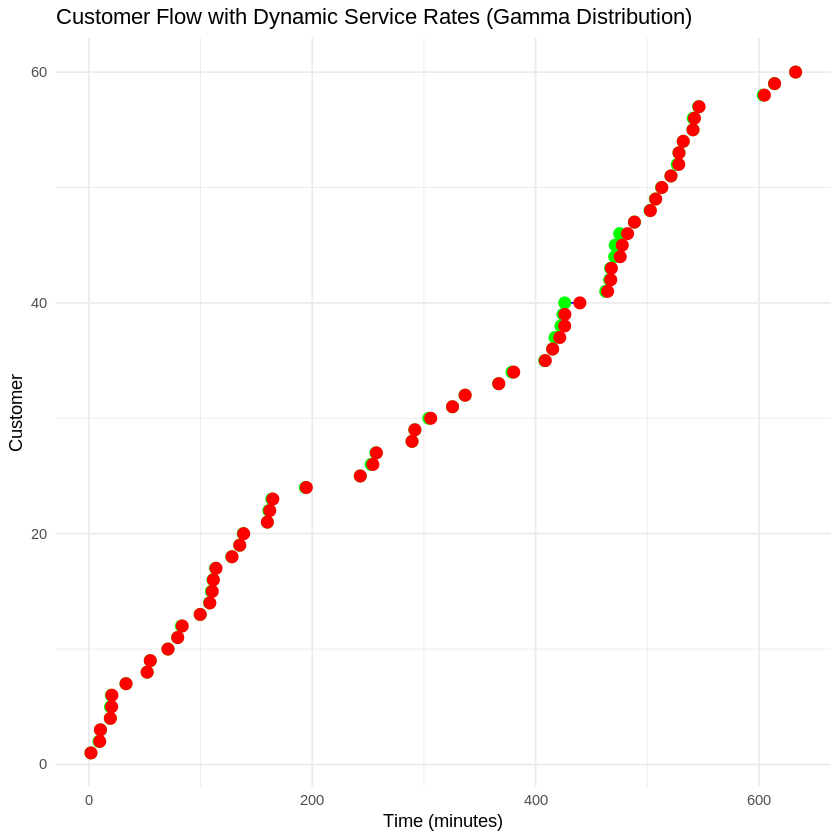

In [37]:
simulate_dynamic_service_gamma <- function(arrival_times, base_service_rate, peak_start, peak_end, shape_peak = 2, shape_offpeak = 5, scale_peak = 0.2, scale_offpeak = 0.5) {
  n <- length(arrival_times)

  # Generate service rates based on Gamma Distribution
  service_rates <- numeric(n)
  for (i in 1:n) {
    if (arrival_times[i] >= peak_start & arrival_times[i] < peak_end) {
      # Peak hours: Gamma distribution with smaller shape and scale (slower service)
      service_rates[i] <- rgamma(1, shape = shape_peak, scale = scale_peak)
    } else {
      # Off-peak hours: Gamma distribution with larger shape and scale (faster service)
      service_rates[i] <- rgamma(1, shape = shape_offpeak, scale = scale_offpeak)
    }
    # Ensure service rates are positive and have a minimum bound
    service_rates[i] <- max(service_rates[i], 0.1) # Avoid near-zero or negative rates
  }

  # Generate service times using dynamic service rates
  service_times <- rexp(n, rate = service_rates)

  # Simulate restaurant operations
  result <- simulate_restaurant(arrival_times, service_times)

  # Create raw data
  raw_data <- data.frame(
    Customer = 1:n,
    Arrival = arrival_times,
    Start = result$start_times,
    End = result$end_times,
    Waiting_Time = result$waiting_times,
    Service_Rate = service_rates
  )

  # Summary statistics
  avg_waiting_time <- mean(result$waiting_times)
  avg_service_rate_peak <- mean(service_rates[arrival_times >= peak_start & arrival_times < peak_end])
  avg_service_rate_offpeak <- mean(service_rates[arrival_times < peak_start | arrival_times >= peak_end])

  cat("Summary Statistics:\n")
  cat("Average Waiting Time:", avg_waiting_time, "minutes\n")
  cat("Average Service Rate (Peak Hours):", avg_service_rate_peak, "jobs/hour\n")
  cat("Average Service Rate (Off-Peak Hours):", avg_service_rate_offpeak, "jobs/hour\n")

  return(list(raw_data = raw_data))
}

# Parameters
peak_start <- 6 * 60  # Peak starts at 6 PM
peak_end <- 8 * 60    # Peak ends at 8 PM
base_service_rate <- lambda_S  # Base service rate (jobs/hour)

# Simulate dynamic service rates with Gamma distribution
result_dynamic_gamma <- simulate_dynamic_service_gamma(arrival_times, base_service_rate, peak_start, peak_end)

# Output raw data
print(result_dynamic_gamma$raw_data)

# Plot
plot_simulation <- function(simulation_data) {
  ggplot(simulation_data) +
    geom_segment(aes(x = Arrival, xend = End, y = Customer, yend = Customer), color = "blue") +
    geom_point(aes(x = Arrival, y = Customer), color = "green", size = 3, shape = 21, fill = "green") +
    geom_point(aes(x = End, y = Customer), color = "red", size = 3, shape = 21, fill = "red") +
    labs(
      x = "Time (minutes)",
      y = "Customer",
      title = "Customer Flow with Dynamic Service Rates (Gamma Distribution)"
    ) +
    theme_minimal()
}

plot_simulation(result_dynamic_gamma$raw_data)


# **Scenario 2**

Consider the setting with 5 dining tables and L chefs, with operating hours 10am - 10pm. Suppose customers arrive according to a Poisson process with a rate of λ<sub>A</sub> = 10 per hour. Once a customer arrives, their total service time can be modeled by an exponential distribution with rate λ<sub>S</sub> = 3L. Assume a customer spends 50 dollars per meal, and each chef earns a wage of 40 dollars per hour.

Plausible questions: Comment on the customer’s queueing experience in this setting, particularly we vary the number of chefs L. From a business perspective, how many chefs L should be hired to maximize profits with high probability? Justify your recommendation. Comment on the down-time of the restaurant throughout the day, and what this might means for business operation.

# **More Possible Senarios to Consider**
Here are the 10 extensions with specific details added to guide the scenarios:

1. **Variable Customer Arrival Rates**:
   - Assume peak hours are 12:00 PM - 2:00 PM and 6:00 PM - 8:00 PM with a customer arrival rate of 15 customers/hour (Poisson process). Off-peak hours have a rate of 5 customers/hour. Analyze how these fluctuations impact waiting times and required staff levels.

2. **Customer Groups and Table Sizes**:
   - Assume 40% of arrivals are groups of 2, 30% groups of 4, and 30% single customers. Each group requires appropriately sized tables (2-seater, 4-seater). Simulate how accommodating these groups affects wait times and table utilization.

3. **Menu Complexity and Service Time**:
   - Introduce two menu types: a "Basic Menu" with an average service time of 15 minutes (Exponential, rate = 4) and a "Gourmet Menu" with an average service time of 30 minutes (Exponential, rate = 2). Determine how changing 50% of the orders to the Gourmet Menu affects overall service efficiency.

4. **Special Events or Promotions**:
   - Simulate a Friday night "Happy Hour" from 5:00 PM - 7:00 PM with an increased arrival rate of 20 customers/hour. Customers during this period spend an average of 30 dollars per meal instead of 50 dollars. Evaluate its profitability compared to regular evenings.

5. **Customer Patience and Abandonment**:
   - Assume customers are willing to wait up to 10 minutes on average (Exponential patience distribution with rate = 0.1). After this, 25% of them leave without being served. Analyze the impact of adding an extra chef to reduce abandonment rates.

6. **Multi-Level Staff Management**:
   - Introduce a model with 2 waitstaff for every chef, where waitstaff handle seating and order-taking, reducing the chef's service time from 15 minutes to 10 minutes on average (Exponential, rate = 6). Analyze how this division of labor impacts profits and downtime.

7. **Dynamic Pricing**:
   - Assume dynamic pricing increases meal costs by 20% during peak hours (lunch and dinner) and reduces them by 10% during off-peak hours. Evaluate its impact on daily revenue and peak-hour customer retention.

8. **Delivery and Takeout Orders**:
   - Assume 30% of customers during off-peak hours order takeout, requiring 75% of the service time of dine-in customers (Exponential service rate = 8). Analyze the kitchen workload and the effect on dine-in service times.

9. **Seasonal Variations**:
   - Assume summer months (June-August) increase arrival rates to 12 customers/hour on average, while winter months (December-February) reduce them to 8 customers/hour. Evaluate staffing and profitability adjustments required for these changes.

10. **Health and Safety Constraints**:
    - Simulate a social distancing policy limiting occupancy to 3 active dining tables at any time, with one chef per table. Customers have a 20% higher patience threshold (average of 12 minutes). Assess how this restriction affects customer satisfaction and revenue.

## Distribution Information
Here are the extensions with explicit processes and distributions for modeling:

1. **Variable Customer Arrival Rates**:
   - **Arrival Process**: Poisson process with rate λ = 15 customers/hour for peak hours (12 PM - 2 PM and 6 PM - 8 PM), λ = 5 customers/hour for off-peak hours.
   - **Service Times**: Exponential distribution with rate μ = 6 customers/hour.

2. **Customer Groups and Table Sizes**:
   - **Arrival Process**: Poisson process with λ = 10 customers/hour.
   - **Group Sizes**: Discrete distribution: P(single) = 0.3, P(group of 2) = 0.4, P(group of 4) = 0.3.
   - **Service Times**: Exponential distribution with rate μ= 4 (single), 2.5 (group of 2), 1.5 (group of 4).

3. **Menu Complexity and Service Time**:
   - **Arrival Process**: Poisson process with λ = 8 customers/hour.
   - **Service Times**: Mixture of two Exponential distributions: μ1= 4/hour (Basic Menu, probability 0.5), μ2 = 2/hour (Gourmet Menu, probability 0.5).

4. **Special Events or Promotions**:
   - **Arrival Process**: Poisson process with λ = 20 customers/hour during happy hour.
   - **Service Times**: Exponential distribution with rate μ = 5 customers/hour.
   - **Spending per Customer**: Uniform distribution U(25, 35) to model variations in spending during promotions.

5. **Customer Patience and Abandonment**:
   - **Arrival Process**: Poisson process with λ = 10 customers/hour.
   - **Service Times**: Exponential distribution with rate μ = 4 customers/hour.
   - **Patience Times**: Exponential distribution with rate v = 0.1 (mean patience = 10 minutes).

6. **Multi-Level Staff Management**:
   - **Arrival Process**: Poisson process with λ = 12 customers/hour.
   - **Service Times**: Exponential distribution with rate μ = 6 customers/hour when chefs are supported by waitstaff, μ = 4/hour without waitstaff.

7. **Dynamic Pricing**:
   - **Arrival Process**: Poisson process with λ = 15 customers/hour during peak hours,λ= 8 during off-peak.
   - **Service Times**: Exponential distribution with rate μ = 6/hour.
   - **Revenue per Customer**: Piecewise function: $60/customer (peak hours), $45/customer (off-peak).

8. **Delivery and Takeout Orders**:
   - **Arrival Process**: Poisson process with λ= 10 customers/hour.
   - **Takeout Proportion**: Bernoulli distribution with p = 0.3.
   - **Service Times**: Exponential distribution with rate μ = 6/hour (dine-in), μ = 8/hour (takeout).

9. **Seasonal Variations**:
   - **Arrival Process**: Poisson process with λ= 12 customers/hour (summer), λ = 8/hour (winter).
   - **Service Times**: Exponential distribution with rateμ = 6/hour.

10. **Health and Safety Constraints**:
    - **Arrival Process**: Poisson process with λ = 10 customers/hour.
    - **Service Times**: Exponential distribution with rate λ = 6/hour.
    - **Occupancy Constraint**: Uniform distribution U(2, 3)to randomly limit table availability at any given time.

These choices ensure alignment with probabilistic modeling, where Poisson processes are widely used for arrival times and exponential distributions for service times due to their memoryless properties, which are realistic for queueing systems.